## 딥러닝에서 확률론이 필요한 이유
1. 딥러닝은 **확률론 기반의 기계학습 이론**에 바탕을 둠.
2. 손실함수(loss function)들의 작동 원리는 데이터 공간을 통계적으로 해석해서 유도함.
3. 회귀 분석에서 손실함수로 사용되는 L2-노름은 **예측오차의 분산을 가장 최소화하는 방향으로 학습**하도록 유도.
4. 분류 문제에서 사용되는 교차엔트로피는 **모델 예측의 불확실성을 최소화하는 방향으로 학습**하도록 유도.
5. 분산 및 불확실성을 **최소화하기 위해서 측정하는 방법**을 알아야 함.

#### 확률분포는 데이터의 초상화
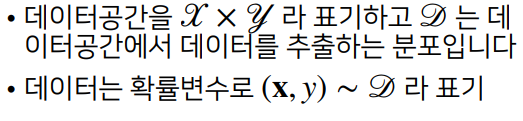
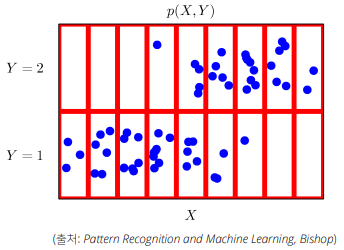
파란 점들이 데이터 공간상에서 관측한 데이터.
이 데이터를 추출할 때 확률변수를 사용한다.
이 확률변수를 추출한 데이터의 분포를 D라고 한다.

#### 이산확률변수 vs 연속확률변수
- 확률변수는 확률분포 D에 따라 이산형(discrete)과 연속형(continuous) 확률변수로 구분.
- 이산형 확률변수는 **확률변수가 가질 수 있는 경우의 수**를 모두 고려하여 **확률을 더해서 모델링**함.
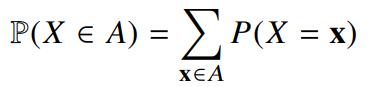
X가 A라는 집합에 속할 확률 분포를 계산할 때, 이 확률변수 X가 x가 될 모든 경우의 수를 고려하여 확률값을 모두 더하는 형태로 모델링.
P(X=x)는 확률변수가 x값을 가질 확률로 해석할 수 있다.

연속형 확률변수는 **데이터 공간에 정의된 확률변수의 밀도(density)** 위에서의 **적분을 통해 모델링**한다.
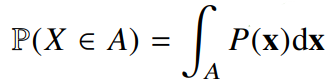
밀도는 누적확률분포의 변화율로 모델링하며 확률로 해석하면 안 된다.

모든 확률변수가 위 두가지로 구분되는 것은 아니다.

----

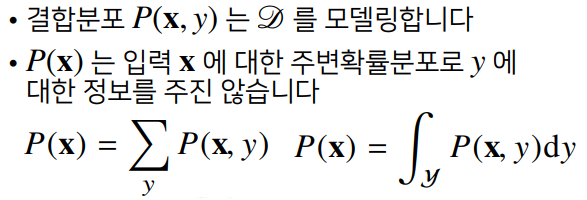
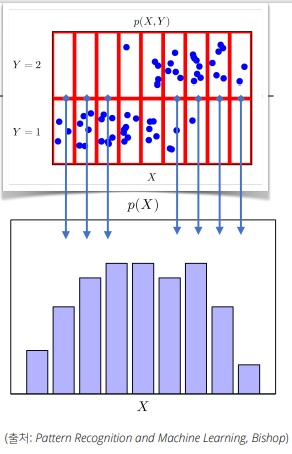
주변확률분포 P(x)는 결합분포 P(x,y)에서 유도 가능하다.

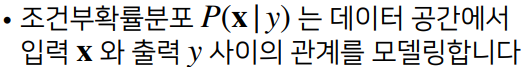
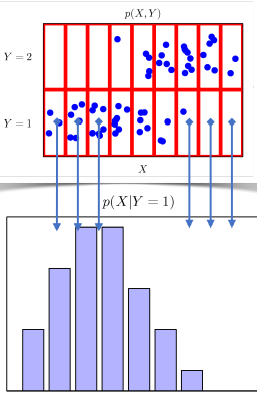
P(X|y)는 특정 클래스가 주어진 조건에서 데이터의 확률분포를 보여줌.

조건부 확률분포를 사용하면 좀 더 명확한 통계적 관계를 모델링 할 수 있다.

- 조건부확률 P(y|x)는 입력변수 x에 대해 정답이 y일 확률을 의미
- 로지스틱 회귀에서 사용했던 선형모데로가 소프트맥스 함수의 결합은 **데이터에서 추출된 패턴을 기반으로 확률을 해석**하는데 사용.
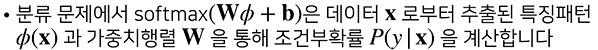
- 회귀 문제의 경우 조건부기대값 E[y|x]을 추정
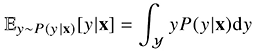

### 기대값이란?
- 확률분포가 주어지면 데이터를 분석하는 데 사용 가능한 여러 종류의 **통계적 범함수(statistical functional)를 계산**할 수 있다.
- **기대값(expectation)은 데이터를 대표하는 통계량**이면서 동시에 확률분포를 통해 다른 통계적 범함수를 계산하는데 사용.
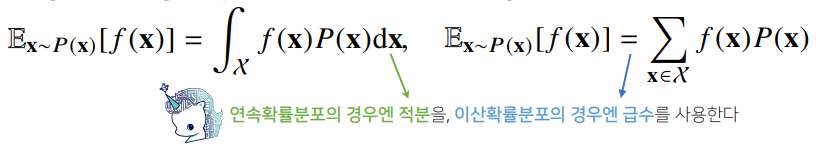
1. 연속분포 : 주어진 함수에 확률밀도함수를 곱하여 적분
2. 이산분포 : 주어진 함수에 확률질량함수를 곱해서 서메이션

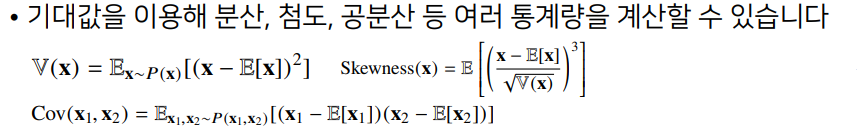
수식에 f대신 대입하면 통계량 계산 가능.

----

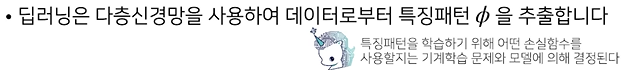

### 몬테카를로 샘플링
- 기계학습의 많은 문제들은 확률분포를 명시적으로 거의 모른다.
- 확률분포를 모를 때 **데이터를 이용하여 기대값을 계산하려면 몬테카를로(Monte Carlo)샘플링 방법을 사용**해야 한다.
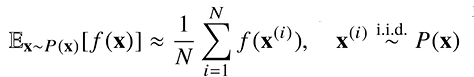
몬테카를로는 이산형과 연속형 모두 성립. 샘플링 할 때 독립적으로 해줘야 한다.
- 몬테카를로 샘플링은 독립추출만 보장된다면 **대수의 법칙(law of large number)에 의해 수렴성을 보장**한다.

### 몬테카를로 예제

부정적분 공식으로 적분 계산이 쉽지 않음.
몬테카를로 방법을 통해 위 함수의 적분을 근사시킬 수 있다.

균등분포 [-1,1]에서 데이터 샘플링 하여 확률 분포로 바꿔주기 위해 적분값을 2로 나눠줌. => 기대값을 구하는 것과 같으니 몬테카를로 사용 가능.

In [3]:
import numpy as np

def mc_int(fun, low, high, sample_size=100, repeat=10):
    int_len = np.abs(high - low)
    stat = []
    for _ in range(repeat):
        x = np.random.uniform(low=low, high=high, size=sample_size)
        fun_x = fun(x)
        int_val = int_len * np.mean(fun_x)
        stat.append(int_val)
    return np.mean(stat), np.std(stat)

def f_x(x):
    return np.exp(-x**2)

print(mc_int(f_x, low=-1, high=1, sample_size=10000, repeat=100))

(1.4939672466948821, 0.004559098296767619)


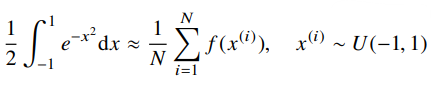
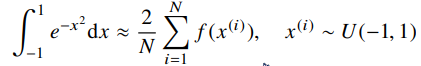